<a href="https://colab.research.google.com/github/charlesellis1/dylan/blob/main/BD_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis of Bob Dylan's Lyrics

##Part A: Preprocessing

In [ ]:
!pip install lyricsgenius

     |████████████████████████████████| 61kB 3.3MB/s 


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from collections import Counter 
import lyricsgenius as lg

In [ ]:
genius = lg.Genius('fmMuhUGjoqw0SteoOjHVD4cRzVq4-ygRLs_repmxuQ6Ybo_Bf2pLqgq_DJp3gBbO')

In [ ]:
artist = genius.search_artist("Bob Dylan", max_songs=2)
print(artist.songs)

Searching for songs by Bob Dylan...

Song 1: "Murder Most Foul"
Song 2: "Blowin’ in the Wind"

Reached user-specified song limit (2).
Done. Found 2 songs.
[Song(id, artist, ...), Song(id, artist, ...)]


In [ ]:
# #Note: Input albums that correspond to certain phases of Bob Dylan's career based on the Rolling Stone
# # article and other research.

# protest_singer=["The Freewheelin' Bob Dylan", "The Times They Are A-Changin'", "Another Side of Bob Dylan"]
# electric_years=["Bringing It All Back Home", "Highway 61 Revisited", "Blonde On Blonde"]
# genius_in_seclusion=["John Wesley Harding", "Nashville Skyline", "Self Portrait", "New Morning"]
# back_on_the_road=["Blood On The Tracks", "Desire", "Street-Legal"]
# born_again=["Slow Train Coming", "Saved", "Shot of Love"]
# lost_in_80s=["Infidels", "Empire Burlesque", "Knocked Out Loaded"]
# never_ending_tour=["Oh Mercy", "Under The Red Sky", "Good As I Been To You"]
# creative_comeback=[""]
# phases=[protest_singer, electric_years, genius_in_seclusion, back_on_the_road, born_again]


In [ ]:
album_list_total = ["Bob Dylan by Bob Dylan", 
                    "The Freewheelin' Bob Dylan", "The Times They Are A-Changin'", "Another Side of Bob Dylan",
                    "Bringing It All Back Home", "Highway 61 Revisited", "Blonde On Blonde", 
                    "John Wesley Harding", "Nashville Skyline", "Self Portrait", "New Morning",
                    "Pat Garrett & Billy the Kid", "Planet Waves", "Blood On The Tracks", "Desire", "Street-Legal", 
                    "Slow Train Coming", "Saved", "Shot of Love",
                    "Infidels", "Empire Burlesque", "Knocked Out Loaded", 
                    "Down in the Groove", "Oh Mercy", "Under The Red Sky", "Good As I Been To You", 
                    "World Gone Wrong", "Time Out of Mind", "Love and Theft", 
                    "Modern Times", "Together Through Life", "Christmas in the Heart", 
                    "Tempest", "Shadows in the Night", "Fallen Angels", "Triplicate", 
                    "Rough and Rowdy Ways"]
album_list_year = ['1962', 
                   '1963', '1964', '1964', 
                   '1965', '1965', '1966', 
                   '1967', '1969', '1970', '1970', 
                   '1973', '1974', '1975', '1976', '1978', 
                   '1979', '1980', '1981', 
                   '1983', '1985', '1986', 
                   '1988', '1989', '1990', '1992', 
                   '1993', '1997', '2001', 
                   '2006', '2009', '2009', 
                   '2012', '2015', '2016', '2017', 
                   '2020']



In [ ]:
# bob_dylan=["You're No Good", "Talkin' New York", "In My Time of Dyin'", "Man of Constant Sorrow",
#            "Fixin' to Die", "Pretty Peggy-O", "Highway 51 Blues", "Gospel Plow", "Baby, Let Me Follow You Down",
#            "House of the Risin' Sun", "Freight Train Blues", "Song to Woody", "See That My Grave Is Kept Clean"]

# freewheelin=["Blowin' in the Wind", "Girl from the North Country", "Masters of War", "Down the Highway", 
#              "Bob Dylan's Blues", "A Hard Rain's A-Gonna Fall", "Don't Think Twice, It's All Right", 
#              "Bob Dylan's Dream", "Oxford Town", "Talkin' World War III Blues", "Corinna, Corrina", 
#              "Honey, Just Allow Me One More Chance", "I Shall Be Free"]

# times_achangin=["The Times They Are A-Changin'", "Ballad of Hollis Brown", "With God on Our Side", 
#                 "One Too Many Mornings", "North Country Blues", "Only a Pawn in Their Game", 
#                 "Boots of Spanish Leather", "When the Ship Comes In", "The Lonesome Death of Hattie Carroll", 
#                 "Restless Farewell"]

# another_side = ["All I Really Want To Do", "Black Crow Blues", "Spanish Harlem Incident", "Chimes of Freedom", 
#                 "I Shall Be Free No. 10", "To Ramona", "Motorpsycho Nightmare", "My Back Pages", 
#                 "I Don't Believe You (She Acts Like We Never Have Met)", "Ballad in Plain D", 
#                 "It Ain't Me Babe"]
# bringin_it=["Subterranean Homesick Blues", "She Belongs to Me", "Maggie's Farm", "Love Minus Zero", 
#             "Outlaw Blues", "On the Road Again", "Bob Dylan's 115th Dream", "Mr. Tambourine Man", 
#             "Gates of Eden", "It's Alright Ma (I'm Only Bleeding)", "It's All over Now, Baby Blue"]

# highway_61 = ['Highway 61 Revisited', 'Like a Rolling Stone', 'Tombstone Blues', 
#               'It Takes a Lot to Laugh, It Takes a Train to Cry', 'From a Buick 6', 
#               'Ballad of a Thin Man', 'Queen Jane Approximately', 'Highway 61 Revisited', 
#               "Just Like Tom Thumb's Blues", 'Desolation Row']

# blonde_on_blonde = ["Rainy Day Women #12 & 35", "Pledging My Time", "Visions of Johanna", 
#                     "One of Us Must Know (Sooner or Later)", "I Want You", 
#                     "Stuck Inside of Mobile with the Memphis Blues Again", 
#                     "Leopard-Skin Pill-Box Hat", "Just Like a Woman", 
#                     "Most Likely You Go Your Way (And I'll Go Mine)", 
#                     "Temporary Like Achilles", "Absolutely Sweet Marie", 
#                     "Fourth Time Around", "Obviously Five Believers", 
#                     "Sad-Eyed Lady of the Lowlands"]

# john_wesley_harding=["John Wesley Harding", "As I Went out One Morning", "I Dreamed I saw St. Augustine", 
#                      "All Along the Watchtower", "The Ballad of Frankie Lee and Judas Priest", "Drifter's Escape", 
#                      "Dear Landlord", "I Am a Lonesome Hobo", "I Pity the Poor Immigrant", "The Wicked Messenger", 
#                      "Down Along the Cove", "I'll Be Your Baby Tonight"]

# self_portrait=["All the Tired Horses", "Alberta #1", "I Forgot More Than You'll Ever Know", "Days of '49", 
#                "Early Mornin' Rain", "In Search of Little Sadie", "Let it Be Me", "Little Sadie", 
#                "Woogie Boogie", "Belle Isle", "Living the Blues", "Copper Kettle", "Gotta Travel On", 
#                "Blue Moon"]



In [ ]:
# df = pd.DataFrame()
# df['Album'] = album_list_total
# df['Year'] = album_list_year
# df.tail()

In [ ]:
def get_album_lyrics(album_list, year_list):

    df = pd.DataFrame()

    #Loop through all songs in list/album
    for i in range(len(album_list)):
        album=genius.search_album(album_list[i], "Bob Dylan")
        album_row=album.to_text()
        df=df.append([album_row], ignore_index=True)    
    
    #Rename Lyrics Column
    df=df.rename(columns={0: "lyrics"})
    #Clean Lyrics 
    df["lyrics"]= df["lyrics"].str.replace("\n", " ")
    df["lyrics"] = df["lyrics"].str.replace(r"(\s*\[.*?\]\s*)"
                                            , " ").str.strip()
    df["lyrics"] = df["lyrics"].str.replace("\\'", " ")
    df["lyrics"] = df['lyrics'].str.replace('[^\w\s]','')
    df["lyrics"] = df["lyrics"].str.lower()
    df["lyrics"] = df['lyrics'].str.replace(' don t'," dont ")
    df["lyrics"] = df["lyrics"].str.replace('you re', "youre")
    df["lyrics"] = df["lyrics"].str.replace('can t', "cant")
    df["lyrics"] = df["lyrics"].str.replace('ain t', "aint")

    #Finalize DataFrame
    
    df["album"]=album_list
    df['year']=year_list
    df=df[["album", "year", "lyrics"]]

    return df

Gather seperate dataframes representing each phase in Bob Dylan's musical career. 

In [ ]:
get_album_lyrics(["Bringing It All Back Home"], ['1964'])

Searching for "Bringing It All Back Home" by Bob Dylan...


,album,year,lyrics
0,Bringing It All Back Home,1964,johnny s in the basement mixin up the medicin...


In [ ]:
data = get_album_lyrics(album_list_total, album_list_year)
data.head()

Searching for "Bob Dylan by Bob Dylan" by Bob Dylan...
Searching for "The Freewheelin' Bob Dylan" by Bob Dylan...
Searching for "The Times They Are A-Changin'" by Bob Dylan...
Searching for "Another Side of Bob Dylan" by Bob Dylan...
Searching for "Bringing It All Back Home" by Bob Dylan...
Searching for "Highway 61 Revisited" by Bob Dylan...
Searching for "Blonde On Blonde" by Bob Dylan...
Searching for "John Wesley Harding" by Bob Dylan...
Searching for "Nashville Skyline" by Bob Dylan...
Searching for "Self Portrait" by Bob Dylan...
Searching for "New Morning" by Bob Dylan...
Searching for "Pat Garrett & Billy the Kid" by Bob Dylan...
Searching for "Planet Waves" by Bob Dylan...
Searching for "Blood On The Tracks" by Bob Dylan...
Searching for "Desire" by Bob Dylan...
Searching for "Street-Legal" by Bob Dylan...
Searching for "Slow Train Coming" by Bob Dylan...
Searching for "Saved" by Bob Dylan...
Searching for "Shot of Love" by Bob Dylan...
Searching for "Infidels" by Bob Dylan...

,album,year,lyrics
0,Bob Dylan by Bob Dylan,1962,what the world needs now is love sweet love it...
1,The Freewheelin' Bob Dylan,1963,how many roads must a man walk down before you...
2,The Times They Are A-Changin',1964,come gather round people wherever you roam an...
3,Another Side of Bob Dylan,1964,i aint lookin to compete with you beat or che...
4,Bringing It All Back Home,1965,johnny s in the basement mixin up the medicin...


In [ ]:
data

,album,year,lyrics
0,Bob Dylan by Bob Dylan,1962,what the world needs now is love sweet love it...
1,The Freewheelin' Bob Dylan,1963,how many roads must a man walk down before you...
2,The Times They Are A-Changin',1964,come gather round people wherever you roam an...
3,Another Side of Bob Dylan,1964,i aint lookin to compete with you beat or che...
4,Bringing It All Back Home,1965,johnny s in the basement mixin up the medicin...
5,Highway 61 Revisited,1965,once upon a time you dressed so fine threw the...
6,Blonde On Blonde,1966,well they ll stone you when youre tryin to be...
7,John Wesley Harding,1967,john wesley harding was a friend to the poor h...
8,Nashville Skyline,1969,if youre travelin to the north country fair w...
9,Self Portrait,1970,all the tired horses in the sun how m i suppos...


In [ ]:
from google.colab import auth
from google.colab import drive

# from googleapiclient import build
# service = build('drive', 'v3')

drive.mount('/content/drive')

path = "/content/drive/MyDrive/Charlie Ellis/Coding"

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/Charlie Ellis/Coding/lyrics_data', 'w') as f:
  f.write(data.to_json())

In [ ]:
#Download DataFrame and skip all preprocessing steps
import json

data = pd.read_json('/content/drive/MyDrive/Charlie Ellis/Coding/lyrics_data')
data

,album,year,lyrics
0,Bob Dylan by Bob Dylan,1962,what the world needs now is love sweet love it...
1,The Freewheelin' Bob Dylan,1963,how many roads must a man walk down before you...
2,The Times They Are A-Changin',1964,come gather round people wherever you roam an...
3,Another Side of Bob Dylan,1964,i aint lookin to compete with you beat or che...
4,Bringing It All Back Home,1965,johnny s in the basement mixin up the medicin...
5,Highway 61 Revisited,1965,once upon a time you dressed so fine threw the...
6,Blonde On Blonde,1966,well they ll stone you when youre tryin to be...
7,John Wesley Harding,1967,john wesley harding was a friend to the poor h...
8,Nashville Skyline,1969,if youre travelin to the north country fair w...
9,Self Portrait,1970,all the tired horses in the sun how m i suppos...


##Part B: Sentiment Analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def get_sentiment_score(album_text): 
    scores=sid.polarity_scores(str(album_text))
    return scores

def add_sentiment_scores(lyrics_df):
  new_df = lyrics_df
  new_df['Positive'] = ""
  new_df['Neutral'] = ""
  new_df['Negative'] = ""
  new_df['Compound'] = ""

  for i in np.arange(len(new_df)):
    score = get_sentiment_score(new_df['lyrics'][i])
    new_df['Positive'][i] = score['pos']
    new_df['Neutral'][i] = score['neu']
    new_df['Negative'][i] = score['neg']
    new_df['Compound'][i] = score['compound']

  return new_df



In [ ]:
album_scores = add_sentiment_scores(data)
album_scores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/i

,album,year,lyrics,Positive,Neutral,Negative,Compound
0,Bob Dylan by Bob Dylan,1962,what the world needs now is love sweet love it...,0.2,0.708,0.091,0.9999
1,The Freewheelin' Bob Dylan,1963,how many roads must a man walk down before you...,0.138,0.744,0.118,0.997
2,The Times They Are A-Changin',1964,come gather round people wherever you roam an...,0.094,0.768,0.139,-0.9995
3,Another Side of Bob Dylan,1964,i aint lookin to compete with you beat or che...,0.135,0.744,0.121,0.9991
4,Bringing It All Back Home,1965,johnny s in the basement mixin up the medicin...,0.168,0.735,0.097,0.9998
5,Highway 61 Revisited,1965,once upon a time you dressed so fine threw the...,0.121,0.774,0.105,0.996
6,Blonde On Blonde,1966,well they ll stone you when youre tryin to be...,0.155,0.753,0.092,0.9998
7,John Wesley Harding,1967,john wesley harding was a friend to the poor h...,0.163,0.703,0.134,0.9969
8,Nashville Skyline,1969,if youre travelin to the north country fair w...,0.192,0.744,0.064,0.9997
9,Self Portrait,1970,all the tired horses in the sun how m i suppos...,0.137,0.776,0.088,0.9998


In [ ]:
album_scores["Positive"] = pd.to_numeric(album_scores.Positive, errors='coerce')
album_scores["Negative"] = pd.to_numeric(album_scores.Negative, errors='coerce')
album_scores["Neutral"] = pd.to_numeric(album_scores.Neutral, errors='coerce')
album_scores["Compound"] = pd.to_numeric(album_scores.Compound, errors='coerce')

##Data Visualization

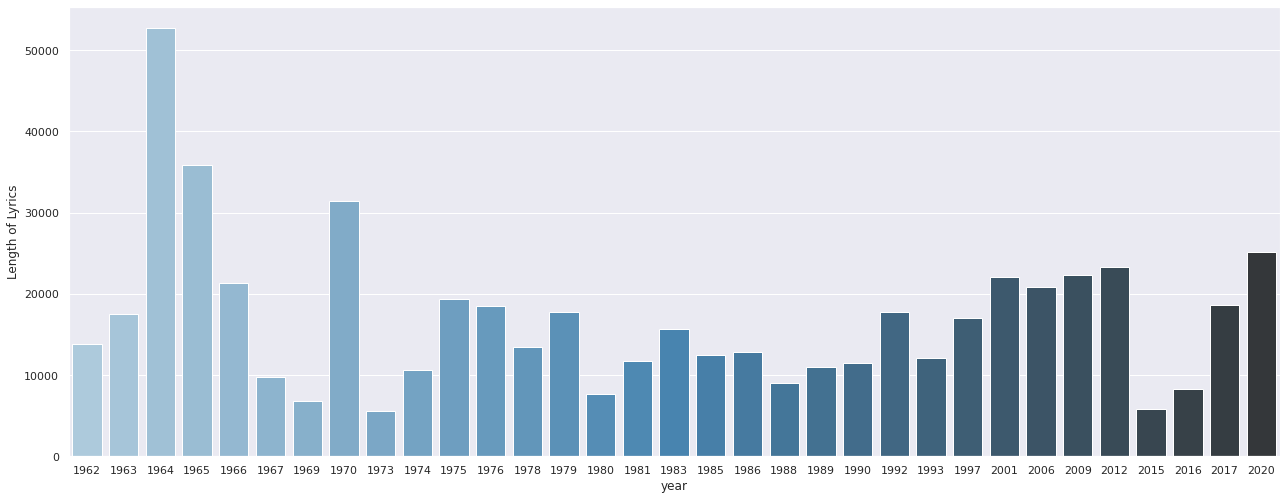

In [ ]:
album_scores['Length of Lyrics'] = [len(lyric) for lyric in album_scores['lyrics']]
grouped_data_1 = album_scores.groupby("year").sum()

sns.barplot(x=grouped_data.index, y="Length of Lyrics", data=grouped_data_1, palette="Blues_d")
sns.set(rc={'figure.figsize':(21.7,8.27)})

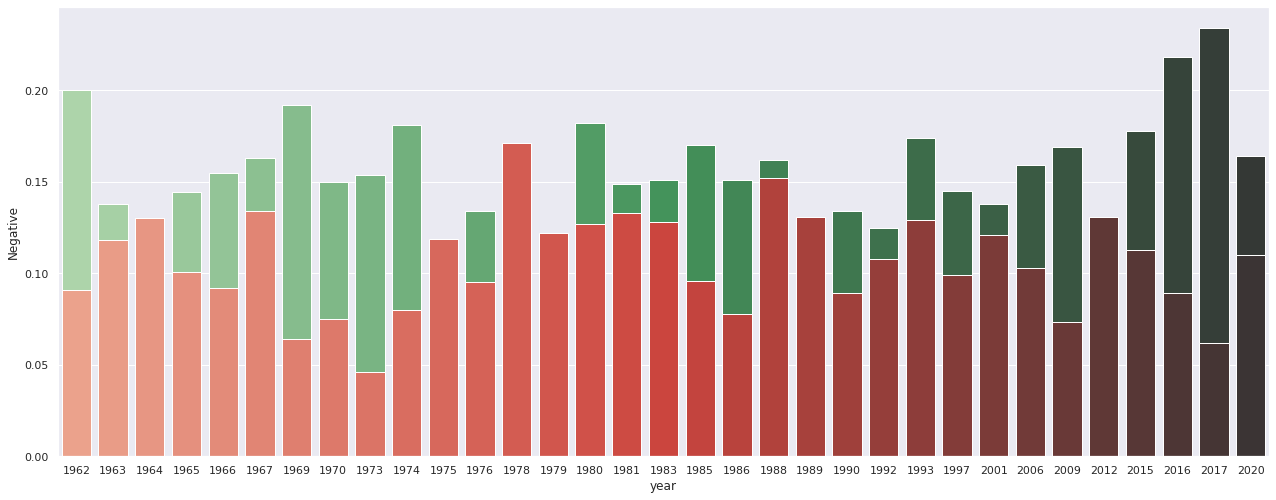

In [ ]:
grouped_data_2 = album_scores.groupby("year").mean()
album_scores['year'] = album_scores["year"].astype(int)

sns.barplot(x=grouped_data.index, y="Positive", data=grouped_data_2, palette="Greens_d")
sns.barplot(x=grouped_data.index, y="Negative", data=grouped_data_2, palette="Reds_d")
sns.set(rc={'figure.figsize':(21.7,8.27)})
# plt.set_xlim(1962, 2020)



In [ ]:
# sns.barplot(x=grouped_data.index, y="Negative", data=grouped_data_2, palette="Reds_d")
# sns.set(rc={'figure.figsize':(21.7,8.27)})

In [ ]:
sixties = album_scores[album_scores['year'] < 1970]
seventies = album_scores[album_scores['year'] < 1980][album_scores['year'] >= 1970]
eighties = seventies = album_scores[album_scores['year'] < 1990][album_scores['year'] >= 1980]
nineties = album_scores[album_scores['year'] < 2000][album_scores['year'] >= 1990]
zeros = album_scores[album_scores['year'] < 2010][album_scores['year'] >= 2000]
tens = seventies = album_scores[album_scores['year'] < 2021][album_scores['year'] >= 2010]

decade_list = [np.mean(sixties), np.mean(seventies), np.mean(eighties), np.mean(nineties), np.mean(zeros), np.mean(tens)]

positive_scores = [decade[1] for decade in decade_list]
negative_scores = [decade[3] for decade in decade_list]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
df = pd.DataFrame()
df['Decade'] = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df['Positive'] = positive_scores
df['Negative'] = negative_scores
df

,Decade,Positive,Negative
0,1960s,0.151778,0.106778
1,1970s,0.183600,0.101000
2,1980s,0.152857,0.120714
3,1990s,0.144500,0.106250
4,2000s,0.158750,0.092750
5,2010s,0.183600,0.101000
